#### Importing Libraries & Loading Data

In [1]:
#This ipynb was developed on Google Colab and uses file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.calibration import CalibratedClassifierCV

Using a sample of data due to limited RAM

In [3]:
total_rows = 404290
sample_size = 200000
rows_to_skip = random.sample(range(1, total_rows+1), total_rows-sample_size)

In [4]:
print(len(rows_to_skip))
rows_to_skip[:10]

204290


[177585, 8488, 220493, 7525, 400469, 21040, 251769, 166132, 251171, 76289]

In [5]:
parent_folder = "/content/drive/MyDrive/AAIC/Projects/Quora Question Pairs"
filename = "train_fe_3.csv"
df = pd.read_csv(parent_folder + "/" + filename, skiprows=rows_to_skip)

In [6]:
df.shape

(200000, 624)

In [7]:
pd.set_option('display.max_columns', None)
df.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,qid1,qid2,question1,question2,is_duplicate,length_difference,unique_length_difference,common_words_count,common_words_share,cwc_min,cwc_max,cnc_min,cnc_max,last_word_equal,first_word_equal,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,q1_1,q1_2,q1_3,q1_4,q1_5,q1_6,q1_7,q1_8,q1_9,q1_10,q1_11,q1_12,q1_13,q1_14,q1_15,q1_16,q1_17,q1_18,q1_19,q1_20,q1_21,q1_22,q1_23,q1_24,q1_25,q1_26,q1_27,q1_28,q1_29,q1_30,q1_31,q1_32,q1_33,q1_34,q1_35,q1_36,q1_37,q1_38,q1_39,q1_40,q1_41,q1_42,q1_43,q1_44,q1_45,q1_46,q1_47,q1_48,q1_49,q1_50,q1_51,q1_52,q1_53,q1_54,q1_55,q1_56,q1_57,q1_58,q1_59,q1_60,q1_61,q1_62,q1_63,q1_64,q1_65,q1_66,q1_67,q1_68,q1_69,q1_70,q1_71,q1_72,q1_73,q1_74,q1_75,q1_76,q1_77,q1_78,q1_79,q1_80,q1_81,q1_82,q1_83,q1_84,q1_85,q1_86,q1_87,q1_88,q1_89,q1_90,q1_91,q1_92,q1_93,q1_94,q1_95,q1_96,q1_97,q1_98,q1_99,q1_100,q1_101,q1_102,q1_103,q1_104,q1_105,q1_106,q1_107,q1_108,q1_109,q1_110,q1_111,q1_112,q1_113,q1_114,q1_115,q1_116,q1_117,q1_118,q1_119,q1_120,q1_121,q1_122,q1_123,q1_124,q1_125,q1_126,q1_127,q1_128,q1_129,q1_130,q1_131,q1_132,q1_133,q1_134,q1_135,q1_136,q1_137,q1_138,q1_139,q1_140,q1_141,q1_142,q1_143,q1_144,q1_145,q1_146,q1_147,q1_148,q1_149,q1_150,q1_151,q1_152,q1_153,q1_154,q1_155,q1_156,q1_157,q1_158,q1_159,q1_160,q1_161,q1_162,q1_163,q1_164,q1_165,q1_166,q1_167,q1_168,q1_169,q1_170,q1_171,q1_172,q1_173,q1_174,q1_175,q1_176,q1_177,q1_178,q1_179,q1_180,q1_181,q1_182,q1_183,q1_184,q1_185,q1_186,q1_187,q1_188,q1_189,q1_190,q1_191,q1_192,q1_193,q1_194,q1_195,q1_196,q1_197,q1_198,q1_199,q1_200,q1_201,q1_202,q1_203,q1_204,q1_205,q1_206,q1_207,q1_208,q1_209,q1_210,q1_211,q1_212,q1_213,q1_214,q1_215,q1_216,q1_217,q1_218,q1_219,q1_220,q1_221,q1_222,q1_223,q1_224,q1_225,q1_226,q1_227,q1_228,q1_229,q1_230,q1_231,q1_232,q1_233,q1_234,q1_235,q1_236,q1_237,q1_238,q1_239,q1_240,q1_241,q1_242,q1_243,q1_244,q1_245,q1_246,q1_247,q1_248,q1_249,q1_250,q1_251,q1_252,q1_253,q1_254,q1_255,q1_256,q1_257,q1_258,q1_259,q1_260,q1_261,q1_262,q1_263,q1_264,q1_265,q1_266,q1_267,q1_268,q1_269,q1_270,q1_271,q1_272,q1_273,q1_274,q1_275,q1_276,q1_277,q1_278,q1_279,q1_280,q1_281,q1_282,q1_283,q1_284,q1_285,q1_286,q1_287,q1_288,q1_289,q1_290,q1_291,q1_292,q1_293,q1_294,q1_295,q1_296,q1_297,q1_298,q1_299,q1_300,q2_1,q2_2,q2_3,q2_4,q2_5,q2_6,q2_7,q2_8,q2_9,q2_10,q2_11,q2_12,q2_13,q2_14,q2_15,q2_16,q2_17,q2_18,q2_19,q2_20,q2_21,q2_22,q2_23,q2_24,q2_25,q2_26,q2_27,q2_28,q2_29,q2_30,q2_31,q2_32,q2_33,q2_34,q2_35,q2_36,q2_37,q2_38,q2_39,q2_40,q2_41,q2_42,q2_43,q2_44,q2_45,q2_46,q2_47,q2_48,q2_49,q2_50,q2_51,q2_52,q2_53,q2_54,q2_55,q2_56,q2_57,q2_58,q2_59,q2_60,q2_61,q2_62,q2_63,q2_64,q2_65,q2_66,q2_67,q2_68,q2_69,q2_70,q2_71,q2_72,q2_73,q2_74,q2_75,q2_76,q2_77,q2_78,q2_79,q2_80,q2_81,q2_82,q2_83,q2_84,q2_85,q2_86,q2_87,q2_88,q2_89,q2_90,q2_91,q2_92,q2_93,q2_94,q2_95,q2_96,q2_97,q2_98,q2_99,q2_100,q2_101,q2_102,q2_103,q2_104,q2_105,q2_106,q2_107,q2_108,q2_109,q2_110,q2_111,q2_112,q2_113,q2_114,q2_115,q2_116,q2_117,q2_118,q2_119,q2_120,q2_121,q2_122,q2_123,q2_124,q2_125,q2_126,q2_127,q2_128,q2_129,q2_130,q2_131,q2_132,q2_133,q2_134,q2_135,q2_136,q2_137,q2_138,q2_139,q2_140,q2_141,q2_142,q2_143,q2_144,q2_145,q2_146,q2_147,q2_148,q2_149,q2_150,q2_151,q2_152,q2_153,q2_154,q2_155,q2_156,q2_157,q2_158,q2_159,q2_160,q2_161,q2_162,q2_163,q2_164,q2_165,q2_166,q2_167,q2_168,q2_169,q2_170,q2_171,q2_172,q2_173,q2_174,q2_175,q2_176,q2_177,q2_178,q2_179,q2_180,q2_181,q2_182,q2_183,q2_184,q2_185,q2_186,q2_187,q2_188,q2_189,q2_190,q2_191,q2_192,q2_193,q2_194,q2_195,q2_196,q2_197,q2_198,q2_199,q2_200,q2_201,q2_202,q2_203,q2_204,q2_205,q2_206,q2_207,q2_208,q2_209,q2_210,q2_211,q2_212,q2_213,q2_214,q2_215,q2_216,q2_217,q2_218,q2_219,q2_220,q2_221,q2_222,q2_223,q2_224,q2_225,q2_226,q2_227,q2_228,q2_229,q2_230,q2_231,q2_232,q2_233,q2_234,q2_235,q2_236,q2_237,q2_238,q2_239,q2_240,q2_241,q2_242,q2_243,q2_244,q2_245,q2_246,q2_247,q2_248,q2_249,q2_250,q2_251,q2_252,q2_253,q2_254,q2_255,q2_256,q2_257,q2_258,q2_25

In [8]:
data = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1','id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'])
y = df['is_duplicate']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 615 entries, length_difference to cosine_similarity
dtypes: float64(606), int64(9)
memory usage: 938.4 MB


#### Random train, test split (70:30)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y, random_state=0)
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (140000, 615)
Number of data points in test data : (60000, 615)


In [11]:
# X_train.isnull().sum().sum()

In [12]:
print(X_train.columns[X_train.isna().any()].tolist())

['q1_1', 'q1_2', 'q1_3', 'q1_4', 'q1_5', 'q1_6', 'q1_7', 'q1_8', 'q1_9', 'q1_10', 'q1_11', 'q1_12', 'q1_13', 'q1_14', 'q1_15', 'q1_16', 'q1_17', 'q1_18', 'q1_19', 'q1_20', 'q1_21', 'q1_22', 'q1_23', 'q1_24', 'q1_25', 'q1_26', 'q1_27', 'q1_28', 'q1_29', 'q1_30', 'q1_31', 'q1_32', 'q1_33', 'q1_34', 'q1_35', 'q1_36', 'q1_37', 'q1_38', 'q1_39', 'q1_40', 'q1_41', 'q1_42', 'q1_43', 'q1_44', 'q1_45', 'q1_46', 'q1_47', 'q1_48', 'q1_49', 'q1_50', 'q1_51', 'q1_52', 'q1_53', 'q1_54', 'q1_55', 'q1_56', 'q1_57', 'q1_58', 'q1_59', 'q1_60', 'q1_61', 'q1_62', 'q1_63', 'q1_64', 'q1_65', 'q1_66', 'q1_67', 'q1_68', 'q1_69', 'q1_70', 'q1_71', 'q1_72', 'q1_73', 'q1_74', 'q1_75', 'q1_76', 'q1_77', 'q1_78', 'q1_79', 'q1_80', 'q1_81', 'q1_82', 'q1_83', 'q1_84', 'q1_85', 'q1_86', 'q1_87', 'q1_88', 'q1_89', 'q1_90', 'q1_91', 'q1_92', 'q1_93', 'q1_94', 'q1_95', 'q1_96', 'q1_97', 'q1_98', 'q1_99', 'q1_100', 'q1_101', 'q1_102', 'q1_103', 'q1_104', 'q1_105', 'q1_106', 'q1_107', 'q1_108', 'q1_109', 'q1_110', 'q1_111

In [13]:
df.iloc[list(X_train[X_train.isnull().any(axis=1)].index)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,qid1,qid2,question1,question2,is_duplicate,length_difference,unique_length_difference,common_words_count,common_words_share,cwc_min,cwc_max,cnc_min,cnc_max,last_word_equal,first_word_equal,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,q1_1,q1_2,q1_3,q1_4,q1_5,q1_6,q1_7,q1_8,q1_9,q1_10,q1_11,q1_12,q1_13,q1_14,q1_15,q1_16,q1_17,q1_18,q1_19,q1_20,q1_21,q1_22,q1_23,q1_24,q1_25,q1_26,q1_27,q1_28,q1_29,q1_30,q1_31,q1_32,q1_33,q1_34,q1_35,q1_36,q1_37,q1_38,q1_39,q1_40,q1_41,q1_42,q1_43,q1_44,q1_45,q1_46,q1_47,q1_48,q1_49,q1_50,q1_51,q1_52,q1_53,q1_54,q1_55,q1_56,q1_57,q1_58,q1_59,q1_60,q1_61,q1_62,q1_63,q1_64,q1_65,q1_66,q1_67,q1_68,q1_69,q1_70,q1_71,q1_72,q1_73,q1_74,q1_75,q1_76,q1_77,q1_78,q1_79,q1_80,q1_81,q1_82,q1_83,q1_84,q1_85,q1_86,q1_87,q1_88,q1_89,q1_90,q1_91,q1_92,q1_93,q1_94,q1_95,q1_96,q1_97,q1_98,q1_99,q1_100,q1_101,q1_102,q1_103,q1_104,q1_105,q1_106,q1_107,q1_108,q1_109,q1_110,q1_111,q1_112,q1_113,q1_114,q1_115,q1_116,q1_117,q1_118,q1_119,q1_120,q1_121,q1_122,q1_123,q1_124,q1_125,q1_126,q1_127,q1_128,q1_129,q1_130,q1_131,q1_132,q1_133,q1_134,q1_135,q1_136,q1_137,q1_138,q1_139,q1_140,q1_141,q1_142,q1_143,q1_144,q1_145,q1_146,q1_147,q1_148,q1_149,q1_150,q1_151,q1_152,q1_153,q1_154,q1_155,q1_156,q1_157,q1_158,q1_159,q1_160,q1_161,q1_162,q1_163,q1_164,q1_165,q1_166,q1_167,q1_168,q1_169,q1_170,q1_171,q1_172,q1_173,q1_174,q1_175,q1_176,q1_177,q1_178,q1_179,q1_180,q1_181,q1_182,q1_183,q1_184,q1_185,q1_186,q1_187,q1_188,q1_189,q1_190,q1_191,q1_192,q1_193,q1_194,q1_195,q1_196,q1_197,q1_198,q1_199,q1_200,q1_201,q1_202,q1_203,q1_204,q1_205,q1_206,q1_207,q1_208,q1_209,q1_210,q1_211,q1_212,q1_213,q1_214,q1_215,q1_216,q1_217,q1_218,q1_219,q1_220,q1_221,q1_222,q1_223,q1_224,q1_225,q1_226,q1_227,q1_228,q1_229,q1_230,q1_231,q1_232,q1_233,q1_234,q1_235,q1_236,q1_237,q1_238,q1_239,q1_240,q1_241,q1_242,q1_243,q1_244,q1_245,q1_246,q1_247,q1_248,q1_249,q1_250,q1_251,q1_252,q1_253,q1_254,q1_255,q1_256,q1_257,q1_258,q1_259,q1_260,q1_261,q1_262,q1_263,q1_264,q1_265,q1_266,q1_267,q1_268,q1_269,q1_270,q1_271,q1_272,q1_273,q1_274,q1_275,q1_276,q1_277,q1_278,q1_279,q1_280,q1_281,q1_282,q1_283,q1_284,q1_285,q1_286,q1_287,q1_288,q1_289,q1_290,q1_291,q1_292,q1_293,q1_294,q1_295,q1_296,q1_297,q1_298,q1_299,q1_300,q2_1,q2_2,q2_3,q2_4,q2_5,q2_6,q2_7,q2_8,q2_9,q2_10,q2_11,q2_12,q2_13,q2_14,q2_15,q2_16,q2_17,q2_18,q2_19,q2_20,q2_21,q2_22,q2_23,q2_24,q2_25,q2_26,q2_27,q2_28,q2_29,q2_30,q2_31,q2_32,q2_33,q2_34,q2_35,q2_36,q2_37,q2_38,q2_39,q2_40,q2_41,q2_42,q2_43,q2_44,q2_45,q2_46,q2_47,q2_48,q2_49,q2_50,q2_51,q2_52,q2_53,q2_54,q2_55,q2_56,q2_57,q2_58,q2_59,q2_60,q2_61,q2_62,q2_63,q2_64,q2_65,q2_66,q2_67,q2_68,q2_69,q2_70,q2_71,q2_72,q2_73,q2_74,q2_75,q2_76,q2_77,q2_78,q2_79,q2_80,q2_81,q2_82,q2_83,q2_84,q2_85,q2_86,q2_87,q2_88,q2_89,q2_90,q2_91,q2_92,q2_93,q2_94,q2_95,q2_96,q2_97,q2_98,q2_99,q2_100,q2_101,q2_102,q2_103,q2_104,q2_105,q2_106,q2_107,q2_108,q2_109,q2_110,q2_111,q2_112,q2_113,q2_114,q2_115,q2_116,q2_117,q2_118,q2_119,q2_120,q2_121,q2_122,q2_123,q2_124,q2_125,q2_126,q2_127,q2_128,q2_129,q2_130,q2_131,q2_132,q2_133,q2_134,q2_135,q2_136,q2_137,q2_138,q2_139,q2_140,q2_141,q2_142,q2_143,q2_144,q2_145,q2_146,q2_147,q2_148,q2_149,q2_150,q2_151,q2_152,q2_153,q2_154,q2_155,q2_156,q2_157,q2_158,q2_159,q2_160,q2_161,q2_162,q2_163,q2_164,q2_165,q2_166,q2_167,q2_168,q2_169,q2_170,q2_171,q2_172,q2_173,q2_174,q2_175,q2_176,q2_177,q2_178,q2_179,q2_180,q2_181,q2_182,q2_183,q2_184,q2_185,q2_186,q2_187,q2_188,q2_189,q2_190,q2_191,q2_192,q2_193,q2_194,q2_195,q2_196,q2_197,q2_198,q2_199,q2_200,q2_201,q2_202,q2_203,q2_204,q2_205,q2_206,q2_207,q2_208,q2_209,q2_210,q2_211,q2_212,q2_213,q2_214,q2_215,q2_216,q2_217,q2_218,q2_219,q2_220,q2_221,q2_222,q2_223,q2_224,q2_225,q2_226,q2_227,q2_228,q2_229,q2_230,q2_231,q2_232,q2_233,q2_234,q2_235,q2_236,q2_237,q2_238,q2_239,q2_240,q2_241,q2_242,q2_243,q2_244,q2_245,q2_246,q2_247,q2_248,q2_249,q2_250,q2_251,q2_252,q2_253,q2_254,q2_255,q2_256,q2_257,q2_258,q2_25

In [14]:
# X_train['cosine_similarity'].fillna(X_train['cosine_similarity'].median(), inplace=True)
# X_test['cosine_similarity'].fillna(X_train['cosine_similarity'].median(), inplace=True)

X_train['cosine_similarity'].fillna(0, inplace=True)
X_test['cosine_similarity'].fillna(0, inplace=True)

In [15]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [16]:
X_train.columns[X_train.isna().any()].tolist()

[]

In [17]:
print("Distribution of output variable in train data")
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print()
print("Distribution of output variable in test data")
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

Distribution of output variable in train data
Class 0:  0.6305642857142857 Class 1:  0.3694357142857143

Distribution of output variable in test data
Class 0:  0.6305666666666667 Class 1:  0.36943333333333334


#### Scaling

In [18]:
X_train.head(5)

,length_difference,unique_length_difference,common_words_count,common_words_share,cwc_min,cwc_max,cnc_min,cnc_max,last_word_equal,first_word_equal,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,q1_1,q1_2,q1_3,q1_4,q1_5,q1_6,q1_7,q1_8,q1_9,q1_10,q1_11,q1_12,q1_13,q1_14,q1_15,q1_16,q1_17,q1_18,q1_19,q1_20,q1_21,q1_22,q1_23,q1_24,q1_25,q1_26,q1_27,q1_28,q1_29,q1_30,q1_31,q1_32,q1_33,q1_34,q1_35,q1_36,q1_37,q1_38,q1_39,q1_40,q1_41,q1_42,q1_43,q1_44,q1_45,q1_46,q1_47,q1_48,q1_49,q1_50,q1_51,q1_52,q1_53,q1_54,q1_55,q1_56,q1_57,q1_58,q1_59,q1_60,q1_61,q1_62,q1_63,q1_64,q1_65,q1_66,q1_67,q1_68,q1_69,q1_70,q1_71,q1_72,q1_73,q1_74,q1_75,q1_76,q1_77,q1_78,q1_79,q1_80,q1_81,q1_82,q1_83,q1_84,q1_85,q1_86,q1_87,q1_88,q1_89,q1_90,q1_91,q1_92,q1_93,q1_94,q1_95,q1_96,q1_97,q1_98,q1_99,q1_100,q1_101,q1_102,q1_103,q1_104,q1_105,q1_106,q1_107,q1_108,q1_109,q1_110,q1_111,q1_112,q1_113,q1_114,q1_115,q1_116,q1_117,q1_118,q1_119,q1_120,q1_121,q1_122,q1_123,q1_124,q1_125,q1_126,q1_127,q1_128,q1_129,q1_130,q1_131,q1_132,q1_133,q1_134,q1_135,q1_136,q1_137,q1_138,q1_139,q1_140,q1_141,q1_142,q1_143,q1_144,q1_145,q1_146,q1_147,q1_148,q1_149,q1_150,q1_151,q1_152,q1_153,q1_154,q1_155,q1_156,q1_157,q1_158,q1_159,q1_160,q1_161,q1_162,q1_163,q1_164,q1_165,q1_166,q1_167,q1_168,q1_169,q1_170,q1_171,q1_172,q1_173,q1_174,q1_175,q1_176,q1_177,q1_178,q1_179,q1_180,q1_181,q1_182,q1_183,q1_184,q1_185,q1_186,q1_187,q1_188,q1_189,q1_190,q1_191,q1_192,q1_193,q1_194,q1_195,q1_196,q1_197,q1_198,q1_199,q1_200,q1_201,q1_202,q1_203,q1_204,q1_205,q1_206,q1_207,q1_208,q1_209,q1_210,q1_211,q1_212,q1_213,q1_214,q1_215,q1_216,q1_217,q1_218,q1_219,q1_220,q1_221,q1_222,q1_223,q1_224,q1_225,q1_226,q1_227,q1_228,q1_229,q1_230,q1_231,q1_232,q1_233,q1_234,q1_235,q1_236,q1_237,q1_238,q1_239,q1_240,q1_241,q1_242,q1_243,q1_244,q1_245,q1_246,q1_247,q1_248,q1_249,q1_250,q1_251,q1_252,q1_253,q1_254,q1_255,q1_256,q1_257,q1_258,q1_259,q1_260,q1_261,q1_262,q1_263,q1_264,q1_265,q1_266,q1_267,q1_268,q1_269,q1_270,q1_271,q1_272,q1_273,q1_274,q1_275,q1_276,q1_277,q1_278,q1_279,q1_280,q1_281,q1_282,q1_283,q1_284,q1_285,q1_286,q1_287,q1_288,q1_289,q1_290,q1_291,q1_292,q1_293,q1_294,q1_295,q1_296,q1_297,q1_298,q1_299,q1_300,q2_1,q2_2,q2_3,q2_4,q2_5,q2_6,q2_7,q2_8,q2_9,q2_10,q2_11,q2_12,q2_13,q2_14,q2_15,q2_16,q2_17,q2_18,q2_19,q2_20,q2_21,q2_22,q2_23,q2_24,q2_25,q2_26,q2_27,q2_28,q2_29,q2_30,q2_31,q2_32,q2_33,q2_34,q2_35,q2_36,q2_37,q2_38,q2_39,q2_40,q2_41,q2_42,q2_43,q2_44,q2_45,q2_46,q2_47,q2_48,q2_49,q2_50,q2_51,q2_52,q2_53,q2_54,q2_55,q2_56,q2_57,q2_58,q2_59,q2_60,q2_61,q2_62,q2_63,q2_64,q2_65,q2_66,q2_67,q2_68,q2_69,q2_70,q2_71,q2_72,q2_73,q2_74,q2_75,q2_76,q2_77,q2_78,q2_79,q2_80,q2_81,q2_82,q2_83,q2_84,q2_85,q2_86,q2_87,q2_88,q2_89,q2_90,q2_91,q2_92,q2_93,q2_94,q2_95,q2_96,q2_97,q2_98,q2_99,q2_100,q2_101,q2_102,q2_103,q2_104,q2_105,q2_106,q2_107,q2_108,q2_109,q2_110,q2_111,q2_112,q2_113,q2_114,q2_115,q2_116,q2_117,q2_118,q2_119,q2_120,q2_121,q2_122,q2_123,q2_124,q2_125,q2_126,q2_127,q2_128,q2_129,q2_130,q2_131,q2_132,q2_133,q2_134,q2_135,q2_136,q2_137,q2_138,q2_139,q2_140,q2_141,q2_142,q2_143,q2_144,q2_145,q2_146,q2_147,q2_148,q2_149,q2_150,q2_151,q2_152,q2_153,q2_154,q2_155,q2_156,q2_157,q2_158,q2_159,q2_160,q2_161,q2_162,q2_163,q2_164,q2_165,q2_166,q2_167,q2_168,q2_169,q2_170,q2_171,q2_172,q2_173,q2_174,q2_175,q2_176,q2_177,q2_178,q2_179,q2_180,q2_181,q2_182,q2_183,q2_184,q2_185,q2_186,q2_187,q2_188,q2_189,q2_190,q2_191,q2_192,q2_193,q2_194,q2_195,q2_196,q2_197,q2_198,q2_199,q2_200,q2_201,q2_202,q2_203,q2_204,q2_205,q2_206,q2_207,q2_208,q2_209,q2_210,q2_211,q2_212,q2_213,q2_214,q2_215,q2_216,q2_217,q2_218,q2_219,q2_220,q2_221,q2_222,q2_223,q2_224,q2_225,q2_226,q2_227,q2_228,q2_229,q2_230,q2_231,q2_232,q2_233,q2_234,q2_235,q2_236,q2_237,q2_238,q2_239,q2_240,q2_241,q2_242,q2_243,q2_244,q2_245,q2_246,q2_247,q2_248,q2_249,q2_250,q2_251,q2_252,q2_253,q2_254,q2_255,q2_256,q2_257,q2_258,q2_259,q2_260,q2_261,q2_262,q2_263,q2_264,q2_265,q2_266,q2_267,q2_268,q2_269,q2_270,q2_271

In [19]:
X_train.head(1).index[0]

138297

In [20]:
print("Sanity Check")
min = X_train['common_words_count'].values.min()
max = X_train['common_words_count'].values.max()
random_index = X_train.head(5).index[1]
x = X_train['common_words_count'][random_index]

print(f"Common Words Count Min : {min}")
print(f"Common Words Count Max : {max}")
print(f"Random value with index {random_index} : {x}")

x_scaled = (x - min) / (max-min)

print(f"After scaling should be: {x_scaled}")

Sanity Check
Common Words Count Min : 0
Common Words Count Max : 41
Random value with index 151620 : 5
After scaling should be: 0.12195121951219512


In [21]:
scaler = MinMaxScaler().fit(X_train)

X_train[X_train.columns] = scaler.transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [22]:
print("Sanity check")
print(f"Value after scaling : {X_train['common_words_count'][random_index]}")

Sanity check
Value after scaling : 0.12195121951219512


In [23]:
X_train.head(2)

,length_difference,unique_length_difference,common_words_count,common_words_share,cwc_min,cwc_max,cnc_min,cnc_max,last_word_equal,first_word_equal,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,q1_1,q1_2,q1_3,q1_4,q1_5,q1_6,q1_7,q1_8,q1_9,q1_10,q1_11,q1_12,q1_13,q1_14,q1_15,q1_16,q1_17,q1_18,q1_19,q1_20,q1_21,q1_22,q1_23,q1_24,q1_25,q1_26,q1_27,q1_28,q1_29,q1_30,q1_31,q1_32,q1_33,q1_34,q1_35,q1_36,q1_37,q1_38,q1_39,q1_40,q1_41,q1_42,q1_43,q1_44,q1_45,q1_46,q1_47,q1_48,q1_49,q1_50,q1_51,q1_52,q1_53,q1_54,q1_55,q1_56,q1_57,q1_58,q1_59,q1_60,q1_61,q1_62,q1_63,q1_64,q1_65,q1_66,q1_67,q1_68,q1_69,q1_70,q1_71,q1_72,q1_73,q1_74,q1_75,q1_76,q1_77,q1_78,q1_79,q1_80,q1_81,q1_82,q1_83,q1_84,q1_85,q1_86,q1_87,q1_88,q1_89,q1_90,q1_91,q1_92,q1_93,q1_94,q1_95,q1_96,q1_97,q1_98,q1_99,q1_100,q1_101,q1_102,q1_103,q1_104,q1_105,q1_106,q1_107,q1_108,q1_109,q1_110,q1_111,q1_112,q1_113,q1_114,q1_115,q1_116,q1_117,q1_118,q1_119,q1_120,q1_121,q1_122,q1_123,q1_124,q1_125,q1_126,q1_127,q1_128,q1_129,q1_130,q1_131,q1_132,q1_133,q1_134,q1_135,q1_136,q1_137,q1_138,q1_139,q1_140,q1_141,q1_142,q1_143,q1_144,q1_145,q1_146,q1_147,q1_148,q1_149,q1_150,q1_151,q1_152,q1_153,q1_154,q1_155,q1_156,q1_157,q1_158,q1_159,q1_160,q1_161,q1_162,q1_163,q1_164,q1_165,q1_166,q1_167,q1_168,q1_169,q1_170,q1_171,q1_172,q1_173,q1_174,q1_175,q1_176,q1_177,q1_178,q1_179,q1_180,q1_181,q1_182,q1_183,q1_184,q1_185,q1_186,q1_187,q1_188,q1_189,q1_190,q1_191,q1_192,q1_193,q1_194,q1_195,q1_196,q1_197,q1_198,q1_199,q1_200,q1_201,q1_202,q1_203,q1_204,q1_205,q1_206,q1_207,q1_208,q1_209,q1_210,q1_211,q1_212,q1_213,q1_214,q1_215,q1_216,q1_217,q1_218,q1_219,q1_220,q1_221,q1_222,q1_223,q1_224,q1_225,q1_226,q1_227,q1_228,q1_229,q1_230,q1_231,q1_232,q1_233,q1_234,q1_235,q1_236,q1_237,q1_238,q1_239,q1_240,q1_241,q1_242,q1_243,q1_244,q1_245,q1_246,q1_247,q1_248,q1_249,q1_250,q1_251,q1_252,q1_253,q1_254,q1_255,q1_256,q1_257,q1_258,q1_259,q1_260,q1_261,q1_262,q1_263,q1_264,q1_265,q1_266,q1_267,q1_268,q1_269,q1_270,q1_271,q1_272,q1_273,q1_274,q1_275,q1_276,q1_277,q1_278,q1_279,q1_280,q1_281,q1_282,q1_283,q1_284,q1_285,q1_286,q1_287,q1_288,q1_289,q1_290,q1_291,q1_292,q1_293,q1_294,q1_295,q1_296,q1_297,q1_298,q1_299,q1_300,q2_1,q2_2,q2_3,q2_4,q2_5,q2_6,q2_7,q2_8,q2_9,q2_10,q2_11,q2_12,q2_13,q2_14,q2_15,q2_16,q2_17,q2_18,q2_19,q2_20,q2_21,q2_22,q2_23,q2_24,q2_25,q2_26,q2_27,q2_28,q2_29,q2_30,q2_31,q2_32,q2_33,q2_34,q2_35,q2_36,q2_37,q2_38,q2_39,q2_40,q2_41,q2_42,q2_43,q2_44,q2_45,q2_46,q2_47,q2_48,q2_49,q2_50,q2_51,q2_52,q2_53,q2_54,q2_55,q2_56,q2_57,q2_58,q2_59,q2_60,q2_61,q2_62,q2_63,q2_64,q2_65,q2_66,q2_67,q2_68,q2_69,q2_70,q2_71,q2_72,q2_73,q2_74,q2_75,q2_76,q2_77,q2_78,q2_79,q2_80,q2_81,q2_82,q2_83,q2_84,q2_85,q2_86,q2_87,q2_88,q2_89,q2_90,q2_91,q2_92,q2_93,q2_94,q2_95,q2_96,q2_97,q2_98,q2_99,q2_100,q2_101,q2_102,q2_103,q2_104,q2_105,q2_106,q2_107,q2_108,q2_109,q2_110,q2_111,q2_112,q2_113,q2_114,q2_115,q2_116,q2_117,q2_118,q2_119,q2_120,q2_121,q2_122,q2_123,q2_124,q2_125,q2_126,q2_127,q2_128,q2_129,q2_130,q2_131,q2_132,q2_133,q2_134,q2_135,q2_136,q2_137,q2_138,q2_139,q2_140,q2_141,q2_142,q2_143,q2_144,q2_145,q2_146,q2_147,q2_148,q2_149,q2_150,q2_151,q2_152,q2_153,q2_154,q2_155,q2_156,q2_157,q2_158,q2_159,q2_160,q2_161,q2_162,q2_163,q2_164,q2_165,q2_166,q2_167,q2_168,q2_169,q2_170,q2_171,q2_172,q2_173,q2_174,q2_175,q2_176,q2_177,q2_178,q2_179,q2_180,q2_181,q2_182,q2_183,q2_184,q2_185,q2_186,q2_187,q2_188,q2_189,q2_190,q2_191,q2_192,q2_193,q2_194,q2_195,q2_196,q2_197,q2_198,q2_199,q2_200,q2_201,q2_202,q2_203,q2_204,q2_205,q2_206,q2_207,q2_208,q2_209,q2_210,q2_211,q2_212,q2_213,q2_214,q2_215,q2_216,q2_217,q2_218,q2_219,q2_220,q2_221,q2_222,q2_223,q2_224,q2_225,q2_226,q2_227,q2_228,q2_229,q2_230,q2_231,q2_232,q2_233,q2_234,q2_235,q2_236,q2_237,q2_238,q2_239,q2_240,q2_241,q2_242,q2_243,q2_244,q2_245,q2_246,q2_247,q2_248,q2_249,q2_250,q2_251,q2_252,q2_253,q2_254,q2_255,q2_256,q2_257,q2_258,q2_259,q2_260,q2_261,q2_262,q2_263,q2_264,q2_265,q2_266,q2_267,q2_268,q2_269,q2_270,q2_271

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140000 entries, 138297 to 153579
Columns: 615 entries, length_difference to cosine_similarity
dtypes: float64(615)
memory usage: 662.0 MB


#### Random model

In [25]:
def plot_confusion_matrix(true_y, predicted_y):
    cm = confusion_matrix(true_y, predicted_y)
    labels = ["0", "1"]
    cmap = sns.light_palette((260, 75, 60), input="husl")
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

Log loss on Test Data using Random Model 0.8853473706062321


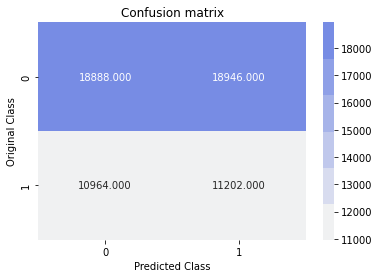

In [26]:
# ref: https://stackoverflow.com/a/18662466/4084039
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

#### Logistic Regression

 12%|█▎        | 1/8 [09:05<1:03:36, 545.16s/it]

For values of alpha =  1e-06 The log loss is: 0.47084277276998526


 25%|██▌       | 2/8 [11:54<32:23, 323.99s/it]  

For values of alpha =  1e-05 The log loss is: 0.4711349313170766


 38%|███▊      | 3/8 [12:53<16:54, 202.92s/it]

For values of alpha =  0.0001 The log loss is: 0.47412968524406


 50%|█████     | 4/8 [13:18<08:50, 132.67s/it]

For values of alpha =  0.001 The log loss is: 0.4891030991427789


 62%|██████▎   | 5/8 [13:33<04:31, 90.36s/it] 

For values of alpha =  0.01 The log loss is: 0.5176600979469911


 75%|███████▌  | 6/8 [13:47<02:08, 64.35s/it]

For values of alpha =  0.1 The log loss is: 0.5408538955432105


 88%|████████▊ | 7/8 [14:01<00:47, 47.93s/it]

For values of alpha =  1 The log loss is: 0.5480571589720235


100%|██████████| 8/8 [14:13<00:00, 106.73s/it]

For values of alpha =  10 The log loss is: 0.5753868558241231


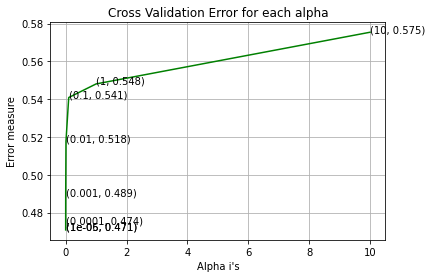

For values of best alpha =  1e-06 The train log loss is: 0.46715653339783764
For values of best alpha =  1e-06 The test log loss is: 0.47084277276998526
Total number of data points : 60000


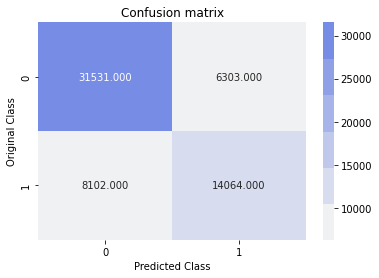

In [27]:
alpha = [10 ** x for x in range(-6, 2)] 

log_error_array=[]
for i in tqdm(alpha):
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

#### XGBoost

In [28]:
# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# model = xgb.XGBClassifier(
#  learning_rate =0.05,
#  n_estimators=200,
#  reg_lambda=3,
#  max_depth=4,
# #  subsample=0.7,
# #  colsample_bytree=0.7,
#  objective= 'binary:logistic',
#  eval_metric = 'logloss',
#  early_stopping_rounds = 20
# )

# watchlist = [(X_train, y_train), [X_test, y_test]]

# model.fit(X_train, y_train, eval_set=watchlist)

In [29]:
import xgboost as xgb
params = {
'objective' : 'binary:logistic',
'eval_metric' : 'logloss',
'eta' : 0.03,
'max_depth' : 5,
'lambda' : 2
}

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'test')]

bst = xgb.train(params, d_train, 500, watchlist, early_stopping_rounds=20, verbose_eval=20)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)

[0]	train-logloss:0.683377	test-logloss:0.683353
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 20 rounds.
[20]	train-logloss:0.563717	test-logloss:0.56337
[40]	train-logloss:0.510897	test-logloss:0.510968
[60]	train-logloss:0.483149	test-logloss:0.484009
[80]	train-logloss:0.466245	test-logloss:0.468033
[100]	train-logloss:0.454321	test-logloss:0.457212
[120]	train-logloss:0.44542	test-logloss:0.449391
[140]	train-logloss:0.437992	test-logloss:0.443095
[160]	train-logloss:0.431528	test-logloss:0.437766
[180]	train-logloss:0.425539	test-logloss:0.433092
[200]	train-logloss:0.419773	test-logloss:0.428556
[220]	train-logloss:0.414299	test-logloss:0.424473
[240]	train-logloss:0.40925	test-logloss:0.420702
[260]	train-logloss:0.404736	test-logloss:0.417495
[280]	train-logloss:0.400624	test-logloss:0.414652
[300]	train-logloss:0.396648	test-logloss:0.411988
[320]	train-logloss:0.392839	test-logloss:0.

The test log loss is: 0.3938130631062435
Total number of data points : 60000


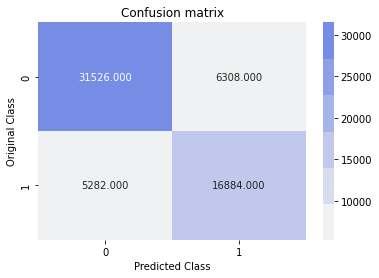

In [30]:
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

#### Observations & Future Work


*   Low regularization (alpha) gives better results for SGDClassifier
*   XGB model starts to overfit a little as the number of rounds progress
*   Try both models with entire data on different colab notebooks
*   Try to tune XBG model
*   Try building new features like tf-idf weighted w2v

